In [1]:
import torch
import torch.nn as nn
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [12]:
n_points = 500
X, y = datasets.make_circles(n_samples=n_points, random_state=123, noise = .1, factor = .2)
# factor 값이 2라는 건, inner circle이 outer circle 크기의 20% 정도라는 의미
X_data = torch.Tensor(X)
y_data = torch.Tensor(y)

In [13]:
def scatter_plot():
    plt.scatter(X[y==0,0],X[y==0,1])
    plt.scatter(X[y==1,0],X[y==1,1])

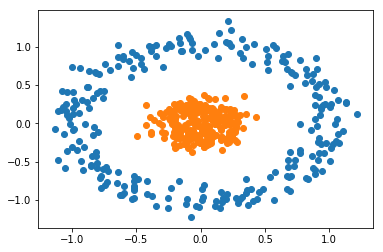

In [14]:
scatter_plot()
# single linear로는 구분이 불가능한 모형

In [15]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_layer1,output_size):
        super().__init__()
        self.linear1 = nn.Linear(input_size, hidden_layer1)
        self.linear2 = nn.Linear(hidden_layer1, output_size)
        
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x)) # linear 통과한 값에 activation func으로 sigmoid 적용
        x = torch.sigmoid(self.linear2(x))
        return x
    
    def predict(self, x):
        pred = self.forward(x)
        if pred >= .5:
            return 1
        else:
            return 0

In [16]:
torch.manual_seed(2)
model = Model(2, 4, 1) # input개수, hidden layer의 node개수, output 개수

# hidden layer node가 2개면 위와 같은 원형 데이터 분류가 불가능, node개수가 너무 많으면 overfit 문제 발생

print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [17]:
criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr = .01)

In [18]:
epochs = 1000
losses=[]
for epoch in range(epochs):
    
    y_pred = model.forward(X_data)
    loss = criterion(y_pred, y_data)
    print('epoch: ',epoch, " Loss: ", loss.item())
    losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

/anaconda3/envs/python3/lib/python3.6/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


epoch:  0  Loss:  0.7148522138595581
epoch:  1  Loss:  0.7117708325386047
epoch:  2  Loss:  0.7089377641677856
epoch:  3  Loss:  0.7063549160957336
epoch:  4  Loss:  0.7040228843688965
epoch:  5  Loss:  0.70194011926651
epoch:  6  Loss:  0.7001039981842041
epoch:  7  Loss:  0.6985078454017639
epoch:  8  Loss:  0.697147011756897
epoch:  9  Loss:  0.6960120797157288
epoch:  10  Loss:  0.695091187953949
epoch:  11  Loss:  0.6943712830543518
epoch:  12  Loss:  0.6938354969024658
epoch:  13  Loss:  0.6934651732444763
epoch:  14  Loss:  0.6932395696640015
epoch:  15  Loss:  0.6931356191635132
epoch:  16  Loss:  0.6931284666061401
epoch:  17  Loss:  0.6931950449943542
epoch:  18  Loss:  0.6933095455169678
epoch:  19  Loss:  0.693450927734375
epoch:  20  Loss:  0.6935993432998657
epoch:  21  Loss:  0.6937385201454163
epoch:  22  Loss:  0.6938555836677551
epoch:  23  Loss:  0.6939424276351929
epoch:  24  Loss:  0.6939952969551086
epoch:  25  Loss:  0.6940122842788696
epoch:  26  Loss:  0.693995

epoch:  352  Loss:  0.3655102550983429
epoch:  353  Loss:  0.3648626506328583
epoch:  354  Loss:  0.364214152097702
epoch:  355  Loss:  0.3635644018650055
epoch:  356  Loss:  0.3629133701324463
epoch:  357  Loss:  0.3622601330280304
epoch:  358  Loss:  0.3616052269935608
epoch:  359  Loss:  0.36094796657562256
epoch:  360  Loss:  0.3602875769138336
epoch:  361  Loss:  0.3596244156360626
epoch:  362  Loss:  0.35895752906799316
epoch:  363  Loss:  0.3582870066165924
epoch:  364  Loss:  0.357612282037735
epoch:  365  Loss:  0.3569331169128418
epoch:  366  Loss:  0.35624921321868896
epoch:  367  Loss:  0.3555602431297302
epoch:  368  Loss:  0.35486558079719543
epoch:  369  Loss:  0.35416513681411743
epoch:  370  Loss:  0.35345813632011414
epoch:  371  Loss:  0.35274505615234375
epoch:  372  Loss:  0.3520251512527466
epoch:  373  Loss:  0.35129785537719727
epoch:  374  Loss:  0.3505629003047943
epoch:  375  Loss:  0.3498203754425049
epoch:  376  Loss:  0.34906914830207825
epoch:  377  Loss:

epoch:  712  Loss:  0.06390032172203064
epoch:  713  Loss:  0.06366568058729172
epoch:  714  Loss:  0.06343315541744232
epoch:  715  Loss:  0.06320256739854813
epoch:  716  Loss:  0.06297403573989868
epoch:  717  Loss:  0.06274744868278503
epoch:  718  Loss:  0.0625227838754654
epoch:  719  Loss:  0.06230006366968155
epoch:  720  Loss:  0.062079161405563354
epoch:  721  Loss:  0.06186020001769066
epoch:  722  Loss:  0.061643000692129135
epoch:  723  Loss:  0.06142762303352356
epoch:  724  Loss:  0.06121404469013214
epoch:  725  Loss:  0.0610022246837616
epoch:  726  Loss:  0.06079214811325073
epoch:  727  Loss:  0.060583774000406265
epoch:  728  Loss:  0.060377009212970734
epoch:  729  Loss:  0.06017198786139488
epoch:  730  Loss:  0.05996861308813095
epoch:  731  Loss:  0.05976684391498566
epoch:  732  Loss:  0.0595666728913784
epoch:  733  Loss:  0.059368014335632324
epoch:  734  Loss:  0.05917099490761757
epoch:  735  Loss:  0.05897550284862518
epoch:  736  Loss:  0.0587815307080745

Text(0.5, 0, 'epochs')

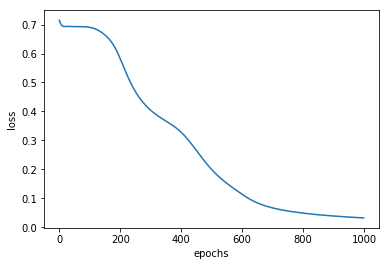

In [19]:
plt.plot(range(epochs),losses)
plt.ylabel('loss')
plt.xlabel('epochs')

# 그래프를 보면 처음 단계에서 loss 감소폭이 상당히 적은 걸 알 수 있다.
# 이 개형은 learning rate이 작다는 신호이기도 함
# .1로 바꾸면 급속도로 떨어지는 걸 볼 수 있다.

In [25]:
temp1 = np.linspace(min(X[:,0]),max(X[:,0]),3)
temp2 = np.linspace(min(X[:,1]),max(X[:,1]),3)
print(temp1)
print(temp2)
np.meshgrid(temp1, temp2)

[-1.13339265  0.04095722  1.21530709]
[-1.22178655  0.05350155  1.32878965]


[array([[-1.13339265,  0.04095722,  1.21530709],
        [-1.13339265,  0.04095722,  1.21530709],
        [-1.13339265,  0.04095722,  1.21530709]]),
 array([[-1.22178655, -1.22178655, -1.22178655],
        [ 0.05350155,  0.05350155,  0.05350155],
        [ 1.32878965,  1.32878965,  1.32878965]])]

In [33]:
def plot_decision_boundary(X, y):
    x_span = np.linspace(min(X[:,0])-.25,max(X[:,0])+.25)
    y_span = np.linspace(min(X[:,1])-.25,max(X[:,1])+.25)
    xx, yy = np.meshgrid(x_span, y_span)
    # 이 결과로 Cartesian grid라는, 전체 데이터셋을 포함하는 grid을 도출한다.
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]) # 1차원 형태로 flatten
    
    pred_func = model.forward(grid) # 주어진 데이터셋의 모든 데이터(좌표라고 해야 할까...)를 대상으로 forward 수행
    
    z = pred_func.view(xx.shape).detach().numpy() 
    # tensor여서 연관되어 있는 모든 연산을 끊는 게 detach인듯. numpy 변환에 에러를 없애준다
    
    plt.contourf(xx, yy, z) # z as an argument. probability를 말함.
    

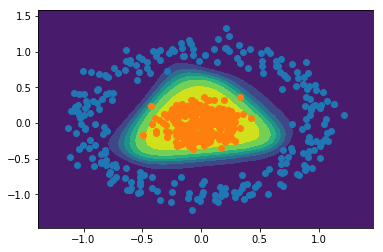

In [34]:
plot_decision_boundary(X, y)
scatter_plot()
# contourf... 이런 식으로 구분하는 게 가능하다. probability가 올라갈수록 단계별로 그래프 색깔이 바뀌는 것

prediction is:  1


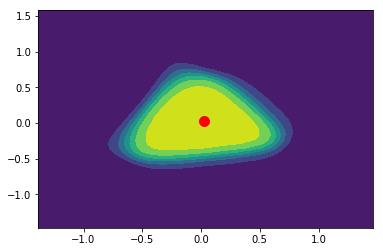

In [37]:
x = .025
y = .025
point = torch.Tensor([x,y])
prediction = model.predict(point)
plt.plot([x],[y],marker='o',markersize=10, color = 'r')
print('prediction is: ',prediction)
plot_decision_boundary(X,y)